In [1]:
import os.path as path_

In [20]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import fbprophet as fbp

In [3]:
data_path = 'data'
submits_path = 'submits'
seed = 110894

In [4]:
df_data = pd.read_csv(path_.join(data_path, 'HW_6_data.csv'))
df_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3242 entries, 0 to 3241
Data columns (total 3 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   dates          3242 non-null   object 
 1   SKU            3242 non-null   int64  
 2   price_per_sku  3242 non-null   float64
dtypes: float64(1), int64(1), object(1)
memory usage: 76.1+ KB


In [5]:
df_data['dates'] = pd.to_datetime(df_data['dates'])

In [6]:
df_test = pd.read_csv(path_.join(data_path, 'HW_6_test.csv'))
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40 entries, 0 to 39
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   SKU     40 non-null     int64 
 1   dates   40 non-null     object
dtypes: int64(1), object(1)
memory usage: 768.0+ bytes


In [7]:
df_test['dates'] = pd.to_datetime(df_test['dates'])

In [66]:
df_data['SKU'].nunique()

10

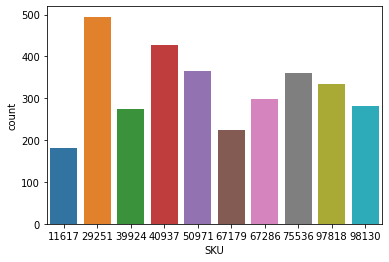

In [67]:
sns.countplot(x='SKU', data=df_data)

In [9]:
df_test['SKU'].nunique()

10

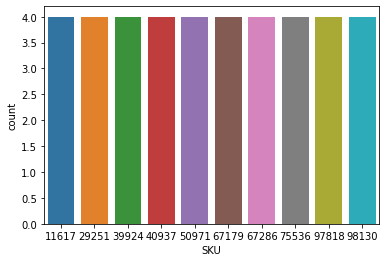

In [10]:
sns.countplot(x='SKU', data=df_test)

In [18]:
(
    df_data
    .groupby('SKU')
    .agg(
        lst_dt=('dates', 'max'),
        max_diff=('dates', lambda x: x.diff().dt.days.max()),
        med_diff=('dates', lambda x: x.diff().dt.days.median()),
    )
)

,lst_dt,max_diff,med_diff
SKU,,,
11617,2019-12-08,5.0,1.0
29251,2019-12-01,5.0,1.0
39924,2019-12-01,5.0,1.0
40937,2019-12-01,4.0,1.0
50971,2019-12-01,3.0,1.0
67179,2019-12-08,6.0,1.0
67286,2019-11-10,4.0,1.0
75536,2019-12-01,4.0,1.0
97818,2019-12-01,7.0,1.0


In [19]:
df_test.groupby('SKU')['dates'].min()

SKU
11617   2019-12-11
29251   2019-12-02
39924   2019-12-02
40937   2019-12-02
50971   2019-12-02
67179   2019-12-09
67286   2019-11-11
75536   2019-12-03
97818   2019-12-02
98130   2019-12-02
Name: dates, dtype: datetime64[ns]

In [48]:
list_skus = list(df_data['SKU'].unique())
list_skus

[11617, 29251, 39924, 40937, 50971, 67179, 67286, 75536, 97818, 98130]

In [70]:
list_dfs = []
for sku in list_skus:
    print(sku)
    df_train = (
        df_data
        .loc[
            df_data['SKU'] == sku,
            ['dates', 'price_per_sku']
        ]
        .rename(columns={'dates': 'ds', 'price_per_sku': 'y'})
        .sort_values('ds')
    )
    
    model = fbp.Prophet(interval_width=0.99)
    model.fit(df_train)
    
    df_predict = (
        df_test
        .loc[
            df_test['SKU'] == sku,
            ['dates']
        ]
        .rename(columns={'dates': 'ds'})
    )
    df_predict = model.predict(df_predict)
    df_predict['SKU'] = sku
    list_dfs.append(df_predict.loc[:, ['SKU', 'ds', 'yhat_lower', 'yhat_upper']])

INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


11617


INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


29251


INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


39924


INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


40937


INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


50971


INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


67179


INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


67286


INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


75536


INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


97818


INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


98130


In [71]:
df_submit_baseline = (
    pd.concat(
        list_dfs,
        ignore_index=True,
    )
    .rename(columns={
        'ds': 'dates',
        'yhat_lower': 'predicted_lower_bound',
        'yhat_upper': 'predicted_upper_bound',
    })
)
df_submit_baseline.head()

,SKU,dates,predicted_lower_bound,predicted_upper_bound
0,11617,2019-12-11,193.013213,196.520048
1,11617,2019-12-16,193.452513,197.092248
2,11617,2019-12-23,193.889753,197.817690
3,11617,2019-12-30,194.343363,198.023193
4,29251,2019-12-02,324.824617,403.142123


In [72]:
df_submit_baseline.to_csv(path_.join(submits_path, 'part2_baseline.csv'), index=False)